<a href="https://colab.research.google.com/github/Legucki/DataScience/blob/master/Micha%C5%82_Legucki_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data and concatenate all files in one dataframe
all_files = [f'/content/drive/MyDrive/Colab_datasets/bicycles/{str(x).zfill(2)}.xlsx' for x in range(4,11)]
li = []

for filename in all_files:
  data = pd.read_excel(filename, skiprows=[0, 1, 2, 3, 4], skipfooter=8, usecols="B:K")
  li.append(data)

data = pd.concat(li, axis=0, ignore_index=True)

print('\nNumber of rows and columns in the data set: ',data.shape)




Number of rows and columns in the data set:  (214, 10)


In [ ]:
data.tail()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
209,2017-10-27,2017-10-27,62.1,48.0,0,3150,5610,6450,5181,20391
210,2017-10-28,2017-10-28,68.0,55.9,0,2245,4520,5104,4069,15938
211,2017-10-29,2017-10-29,64.9,61.0,3.03,183,661,1026,965,2835
212,2017-10-30,2017-10-30,55.0,46.0,0.25,1428,2966,3547,2924,10865
213,2017-10-31,2017-10-31,54.0,44.0,0,2727,5597,5894,4883,19101


**About this Dataset**

The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months in 2017 (source: https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges/gua4-p9wg).

Content

A count of the number of bicycles on each of the bridges in question is provided on a day-by-day basis, along with information on maximum and minimum temperature (°F) and total precipitation (in).
There was added a new column, which differs if it was a workday (Monday-Friday) or a weekendday (Saturda-Sunday) and added this information into a new column as a binary system: 0 for workday, 1 for weekendday.
Also a new column with raw precipitation value was added, because in the column "Precipitation" we have values ifnromation T- trace of precipitation and S- snow, so we made a new column "Snow" where as 0 we have no snow, 1 if the snow occured. The snow occurance means, that it can be slippery, so it can also affect the number of cyclists on the road.

# **Data Preparation:**
We need to clean the data and convert all data to metric units.

In [ ]:
# Convert date in Day column to weekday. ( ! Run once ! )
data['Day'] = pd.to_datetime(data['Day'])
data['Day'] = data['Day'].dt.dayofweek


In [ ]:
# Convert °F to °C ( ! Run once ! )
def fahr_to_celsius(temp_f):
    return (temp_f - 32) * 5 / 9

data['High Temp (°F)'] = fahr_to_celsius(data['High Temp (°F)'])
data['Low Temp (°F)'] = fahr_to_celsius(data['Low Temp (°F)'])

data = data.rename(columns = {'High Temp (°F)' : 'High Temp', 'Low Temp (°F)' : 'Low Temp'})

In [ ]:
# Every bridge / total
bridges = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']

for bridge in bridges:
  data[bridge] = data[bridge] / data['Total']

In [ ]:
data.head()

,Date,Day,High Temp,Low Temp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2017-04-01,5,7.777778,2.777778,0,0.112285,0.267927,0.354827,0.264962,5397
1,2017-04-02,6,16.722222,5.000000,0,0.155068,0.302540,0.322796,0.219596,13033
2,2017-04-03,0,17.222222,10.000000,0.03,0.151302,0.305544,0.317182,0.225972,16325
3,2017-04-04,1,10.611111,7.777778,1.18,0.109862,0.290685,0.346300,0.253153,6581
4,2017-04-05,2,17.222222,7.777778,0,0.156022,0.293258,0.317436,0.233283,17991


In [ ]:
#Remove non numerical values from the Precipitation column:
for el in range(len(data.Precipitation)):
  if data.Precipitation[el] == 'T':
    data.Precipitation[el] = 0.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['Precip_raw'] = pd.to_numeric(data['Precipitation'], downcast='float', errors='coerce')

# **Exploratory data analysis**
Vizualize data and look for correlations. Determine what data will be useful for ML models

In [ ]:
data.describe()

,Day,High Temp,Low Temp,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Precip_raw
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,3.000000,23.445483,16.681724,0.142305,0.283591,0.327017,0.247087,18627.677570,0.132430
std,2.016365,5.772468,5.169884,0.021103,0.017427,0.016211,0.020183,5539.557489,0.394004
min,0.000000,7.777778,2.777778,0.063606,0.203875,0.264560,0.209299,2374.000000,0.000000
25%,1.000000,19.388889,12.902778,0.133907,0.275534,0.317759,0.233897,15704.750000,0.000000
50%,3.000000,24.388889,17.777778,0.140219,0.285854,0.325687,0.246117,19367.000000,0.000000
75%,5.000000,27.777778,21.111111,0.150668,0.296117,0.334389,0.255560,23151.500000,0.037500
max,6.000000,34.388889,25.611111,0.238611,0.324048,0.390696,0.364364,26969.000000,3.030000


Check for missing values

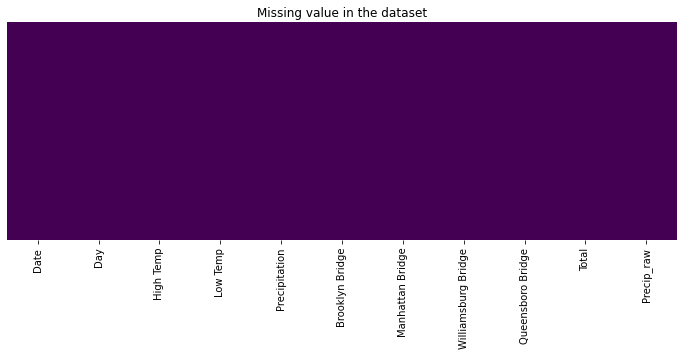

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There are no missing values in the dataset.

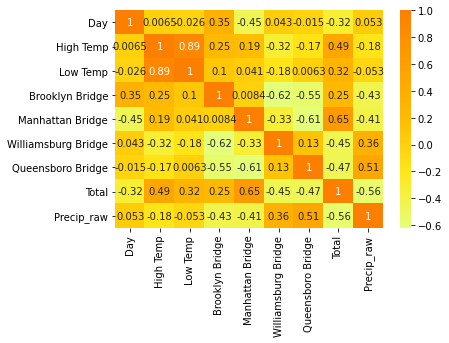

In [ ]:
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

There is no significant correlation among variables.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


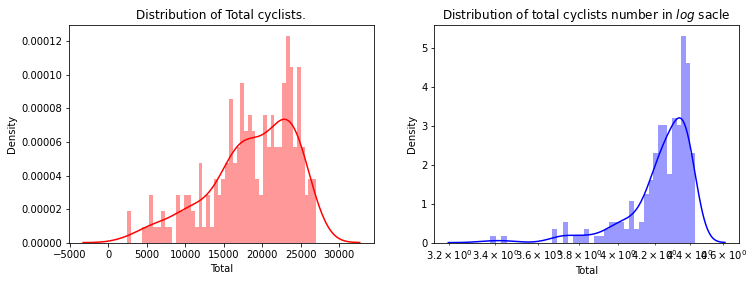

In [ ]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.distplot(data['Total'], bins=50, color='r', ax=ax)
ax.set_title('Distribution of Total cyclists.')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['Total']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of total cyclists number in $log$ sacle')
ax.set_xscale('log');

There is no need to scale the values to logaritmic scale, the graph on the left shows there is a non significant skew of the distribution.

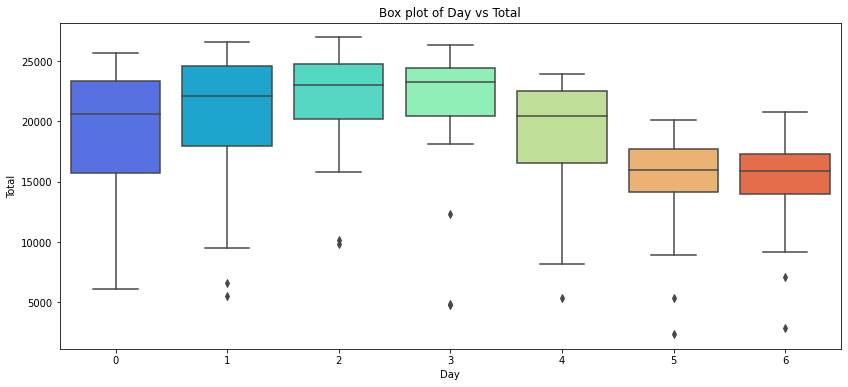

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Day', y='Total', data=data, palette='rainbow')
plt.title('Box plot of Day vs Total');

In [ ]:
data.groupby('Day').agg(['mean','min','max'])['Total']

,mean,min,max
Day,,,
0,18539.129032,6126,25680
1,20253.903226,5493,26622
2,21891.600000,9819,26969
3,21285.100000,4789,26360
4,18572.933333,5356,23944
5,15047.774194,2374,20134
6,14992.548387,2835,20787


Text(0.5, 1.0, 'Scatter plot of High Temp vs Low Temp')

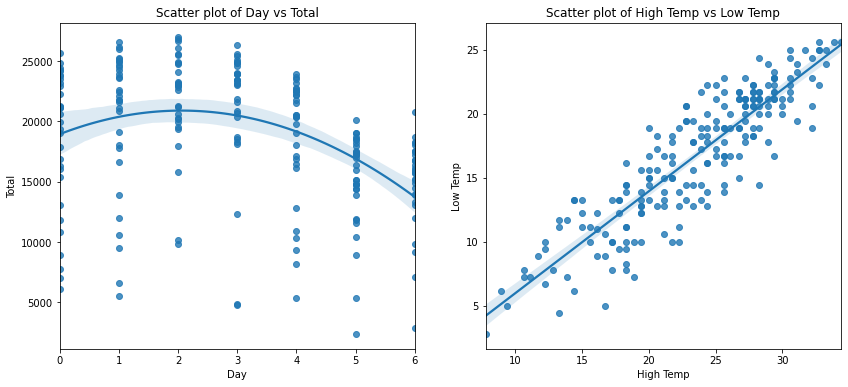

In [ ]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.regplot(x='Day', y = 'Total', data=data, order=2, ax=ax)
ax.set_title('Scatter plot of Day vs Total')

ax = f.add_subplot(122)
sns.regplot(x='High Temp', y='Low Temp', data=data, ax=ax)
ax.set_title('Scatter plot of High Temp vs Low Temp')

Hypothesis: depending on the weekday, high temp and precipitation we can determine how many cyclists will be using the four bridges to cross the river.


In [ ]:
# Prepare data for modelling

X = data[['Day', 'High Temp', 'Precip_raw']]
y = data['Total']
print(X.shape, y.shape)

(214, 3) (214,)


In [ ]:
# Reshape y variable to a matrix of form (214,1)
y = y.values.reshape((len(data),1))
y.shape

(214, 1)

# **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

To determine if the regression model should be Linear or Polynomial we will evaluate several models and compare the results using sklearn metrics.

Below is a function that creates multiple models (linear and polynomial) using different degrees of polynomial regression and stores its metrics for later to compare.

In [ ]:
def polyModel(X_train, X_test, y_train, y_test, degree=3):
  intercept = []
  coef = []
  mse = []
  mae = []
  rsc = []
  dg = []
  model = LinearRegression()
  for i in range(1, (degree + 1)):
    dg.append(i)
    if i == 1:
      model.fit(X_train, y_train)
      intercept.append(model.intercept_)
      coef.append(model.coef_)
      y_pred = model.predict(X_test)
      mse.append(mean_squared_error(y_test, y_pred))
      mae.append(mean_absolute_error(y_test, y_pred))
      rsc.append(r2_score(y_test, y_pred))
    else:
      poly = PolynomialFeatures(degree = i)
      X_poly = poly.fit_transform(X_train)
      model.fit(X_poly, y_train)
      intercept.append(model.intercept_)
      coef.append(model.coef_)
      y_pred = model.predict(poly.transform(X_test))
      mse.append(mean_squared_error(y_test, y_pred))
      mae.append(mean_absolute_error(y_test, y_pred))
      rsc.append(r2_score(y_test, y_pred))
  return (intercept, coef, mae, mse, rsc, dg)

In [ ]:
intercept, coef, mae, mse, rsc, dg = polyModel(X_train, X_test, y_train, y_test, degree=5)

In [ ]:
model_metrics = {'Degree': dg, 'Mean Absolute Error' : mae, 'Mean Squared Error' : mse, 'R2 Score' : rsc}
model_metrics = pd.DataFrame(model_metrics)
model_metrics.set_index('Degree')

,Mean Absolute Error,Mean Squared Error,R2 Score
Degree,,,
1,3438.694993,1.876541e+07,0.381655
2,2403.923784,1.045339e+07,0.655547
3,1942.955430,6.643068e+06,0.781102
4,29638.742073,2.793641e+10,-919.540972
5,193208.149260,6.224913e+11,-20510.898516


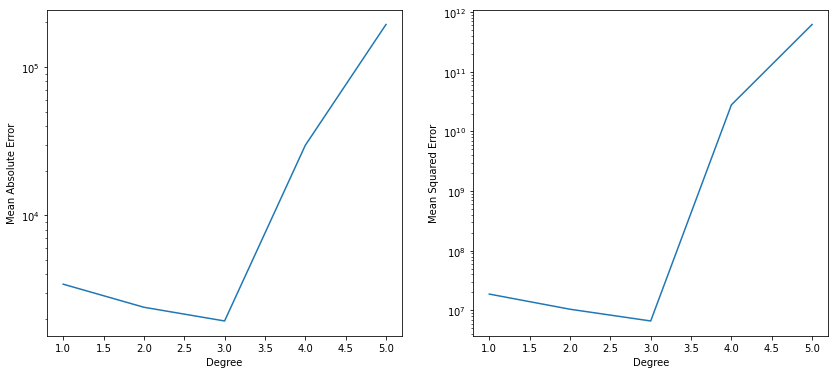

In [ ]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.lineplot(x='Degree', y='Mean Absolute Error', data=model_metrics, ax=ax).set_yscale("log")
ax = f.add_subplot(122)
sns.lineplot(x='Degree', y='Mean Squared Error', data=model_metrics).set_yscale("log")

plt.show(f)

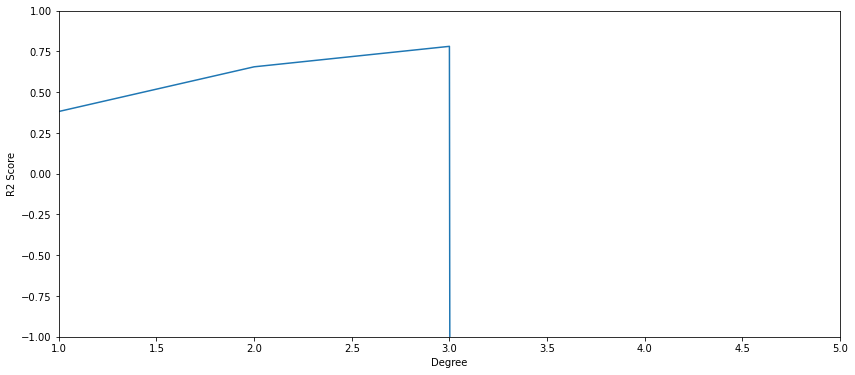

In [ ]:
f = plt.figure(figsize=(14,6))
f = sns.lineplot(x='Degree', y='R2 Score', data=model_metrics)
f.set(xlim=(1, len(model_metrics)))
f.set(ylim=(-1, 1))
plt.show(f)

R2 Score is getting better until degree number 4, where it reaches negative values, because the model gets arbitrarily worse.
For further modelling degrees 4 and above are not taken for consideration.

From all the graphs above we can see that the best metrics are obtained from the polynomial degree = 3. We do need check if the model is not overfitting though.


Using cross validation to determine if the model is overfitted:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
model = LinearRegression()
dg = [2, 3]
scores = []
for d in dg:
  poly = PolynomialFeatures(degree = d)
  X_poly = poly.fit_transform(X_train)
  model.fit(X_poly, y_train)
  cv = KFold(n_splits=10, random_state=42, shuffle=True)
  scores.append(cross_val_score(model, X_poly, y_train, cv=cv, n_jobs=-1))
scores

[array([ 0.80575747,  0.59302572,  0.81299529,  0.24737367, -9.87853004,
         0.67325032,  0.81661555,  0.80442464,  0.70166911,  0.5899405 ]),
 array([ 2.37383626e-01,  7.12543950e-01,  7.50289880e-01, -3.57165392e-02,
        -7.25973605e+01,  5.68154836e-01,  8.70388286e-01,  8.14105164e-01,
         6.15540486e-01,  8.29287976e-01])]

In [ ]:
scores = {'N_splits': range(1, 11), 'Degree = 2' : scores[0], 'Degree = 3' : scores[1]}
scores = pd.DataFrame(scores)
scores.set_index('N_splits')

,Degree = 2,Degree = 3
N_splits,,
1,0.805757,0.237384
2,0.593026,0.712544
3,0.812995,0.750290
4,0.247374,-0.035717
5,-9.878530,-72.597361
6,0.673250,0.568155
7,0.816616,0.870388
8,0.804425,0.814105
9,0.701669,0.615540


No handles with labels found to put in legend.


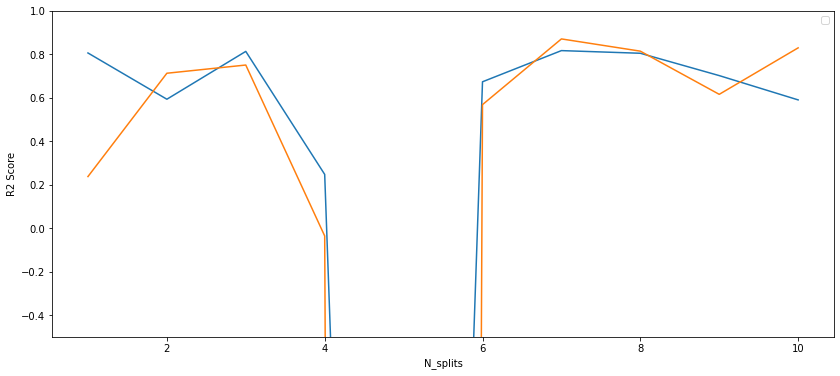

In [ ]:
f = plt.figure(figsize=(14,6))

dg2 = sns.lineplot(x='N_splits', y='Degree = 2', data=scores).set(ylim=(-0.5, 1))
dg3 = sns.lineplot(x='N_splits', y='Degree = 3', data=scores).set(ylim=(-0.5, 1))
plt.legend()
plt.ylabel('R2 Score')
plt.show(f)

For the  N_splits = 5, the R2 score drops significantly, what I am not capable of explaining.
For further analysis degree of polynomial function is set to 2, due to better and more realistic R2 values.

**Additional model testing using: Train, Test, Validate sets in 60%, 20%, 20% ratio**

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model.fit(X_poly, y_train)
pred_test_y = model.predict(poly.transform(X_test))
pred_val_y = model.predict(poly.transform(X_val))

mse = [mean_squared_error(y_test, pred_test_y, squared=False), mean_squared_error(y_val, pred_val_y, squared=False)]
r2 = [r2_score(y_test, pred_test_y), r2_score(y_val, pred_val_y)]
sets = ['Test set', 'Validation set']
d = {'Sets' : sets, 'Mean Squared Error' : mse, "R2 Score" : r2}
scores = pd.DataFrame(d)
scores.set_index('Sets')


,Mean Squared Error,R2 Score
Sets,,
Test set,3233.170711,0.655547
Validation set,2902.704099,0.739548


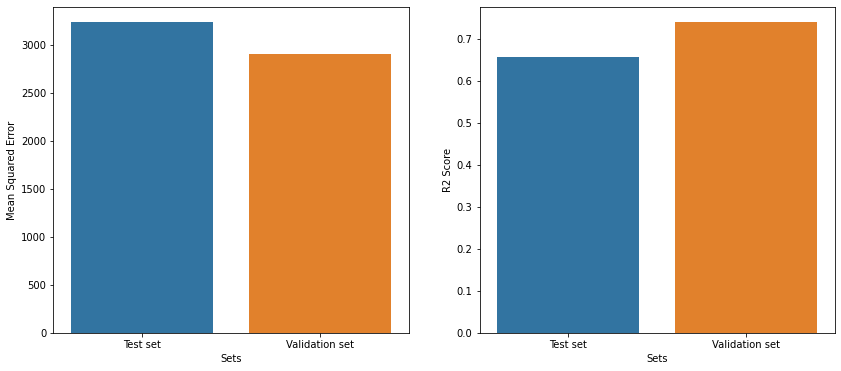

In [ ]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.barplot(x="Sets", y='Mean Squared Error', data=scores, ax=ax)

ax = f.add_subplot(122)
sns.barplot(x="Sets", y='R2 Score', data=scores, ax=ax)


Model did not show any unwanted behaviour while testing it using additional validation sets. The results for the validation set were better than the test set.

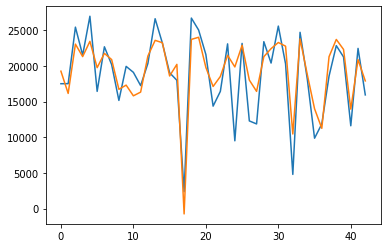

In [ ]:
val = sns.lineplot(x = range(len(y_val.flatten())), y = y_val.flatten())
pred = sns.lineplot(x = range(len(pred_val_y.flatten())), y = pred_val_y.flatten())


**Future Total number of cyclists prediction** using Weather API for data

In [ ]:
import requests
import json
from datetime import datetime

In [ ]:
response = requests.get("https://api.openweathermap.org/data/2.5/onecall?lat=40.730610&lon=-73.935242&units=metric&exclude=current,minutely,hourly,alerts&appid=53089193058b6feff1ec1ddb5e5567ec")
print(response.status_code)

200


In [ ]:
# Parse the json data that we got from the API and transform it into a pandas DataFrame
pred_data_json = json.dumps(response.json(), sort_keys=True, indent=3)
pred_data_json = json.loads(pred_data_json)
pred_data = []
for i in range(len(pred_data_json['daily'])):
  pred_data.append(
      [pred_data_json['daily'][i]['dt'],
      pred_data_json['daily'][i]['temp']['max'],
      pred_data_json['daily'][i]['pop']])
pred_data = pd.DataFrame(pred_data, columns = ['Day', 'High Temp', 'Precip_raw'])

In [ ]:
# Convert / map data to match the values used in training the model:

# Dates:
for el in range(len(pred_data['Day'])):
  pred_data['Day'][el] = datetime.fromtimestamp(pred_data['Day'][el])
pred_data['Day'] = pd.to_datetime(pred_data['Day'])
pred_data['Day'] = pred_data['Day'].dt.dayofweek

# Converting pop (possibility of precipitation) to raw values of precipitation. 
# Assuming maximum precipitation value is 3.0 and that precipitation while pop = 0.3 (30%) equals to 0.3 * 3
pred_data.loc[:,'Precip_raw'] *= 3

pred_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Day,High Temp,Precip_raw
0,2,3.70,3.0
1,3,4.00,0.0
2,4,4.49,0.0
3,5,-0.79,0.0
4,6,-0.29,0.0
5,0,-0.84,3.0
6,1,0.38,0.6
7,2,-0.54,0.0


Now we can use our model to predict the Total values of cyclists in a 7-day forecast.

In [ ]:
# Predict data using our model and create a 'Predicted' column in dataframe:
pred_data_poly = poly.transform(pred_data)
pred_data['Predicted'] = model.predict(pred_data_poly)
pred_data

,Day,High Temp,Precip_raw,Predicted
0,2,3.70,3.0,-6677.751165
1,3,4.00,0.0,6967.832383
2,4,4.49,0.0,6758.076732
3,5,-0.79,0.0,-2202.687223
4,6,-0.29,0.0,-3758.907106
5,0,-0.84,3.0,-18644.797297
6,1,0.38,0.6,-7494.325551
7,2,-0.54,0.0,301.854425


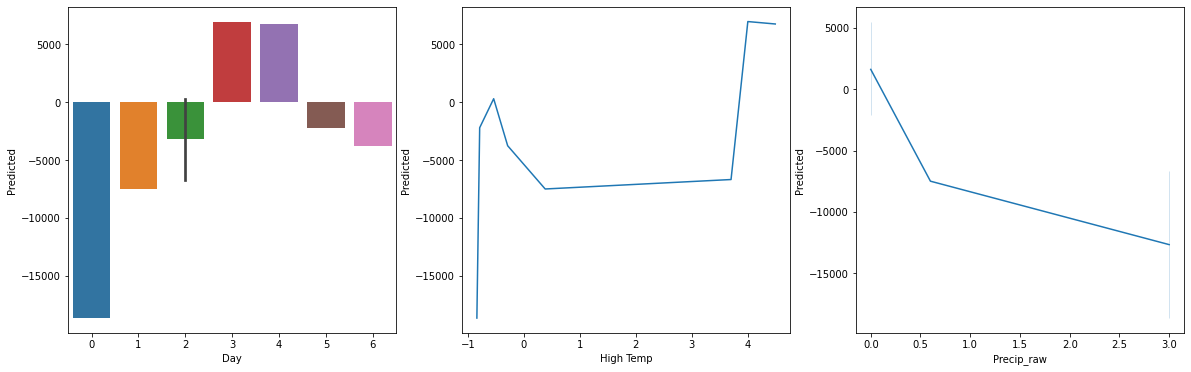

In [ ]:
f = plt.figure(figsize=(20,6))

ax = f.add_subplot(131)
sns.barplot(x = 'Day', y = 'Predicted', data=pred_data, ax=ax)
ax = f.add_subplot(132)
sns.lineplot(x = 'High Temp', y = 'Predicted', data=pred_data, ax=ax)
ax = f.add_subplot(133)
sns.lineplot(x = 'Precip_raw', y = 'Predicted', data=pred_data, ax=ax)

In [ ]:
predictions = pd.DataFrame()
predictions['Predicted LR'] = pred_data['Predicted']

# **Decision Tree Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import tree

In [ ]:
X = pd.DataFrame(X, columns=['Day', 'High Temp', 'Precip_raw'])
y = pd.DataFrame(y, columns=['Total'])

In [ ]:
def rmse(score):
    return np.sqrt(-score)

In [ ]:
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(X))
depth_range = range(1, 16)

for depth in depth_range:
  fold_accuracy = []
  tree_model = tree.DecisionTreeRegressor(max_depth = depth)
  for train_index, test_index in cv.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    model = tree_model.fit(X = X_train, y = y_train)
    valid_acc = model.score(X_train, y_train)
    fold_accuracy.append(valid_acc)
  
  avg = sum(fold_accuracy)/len(fold_accuracy)
  accuracies.append(avg)

df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]


In [ ]:
import plotly.express as px
fig = px.scatter(
    df, x='Max Depth', y='Average Accuracy', opacity=0.65,
    trendline='lowess', trendline_color_override='darkblue'
)
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



The best max_depth parameter seems therefore to be 5 (89.5% average accuracy across the 10 folds), and feeding the model with more data results in worse results probably due to over-fitting. We'll therefore use 5 as the max_depth parameter for our final model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create Decision Tree with max_depth = 5
decision_tree = tree.DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

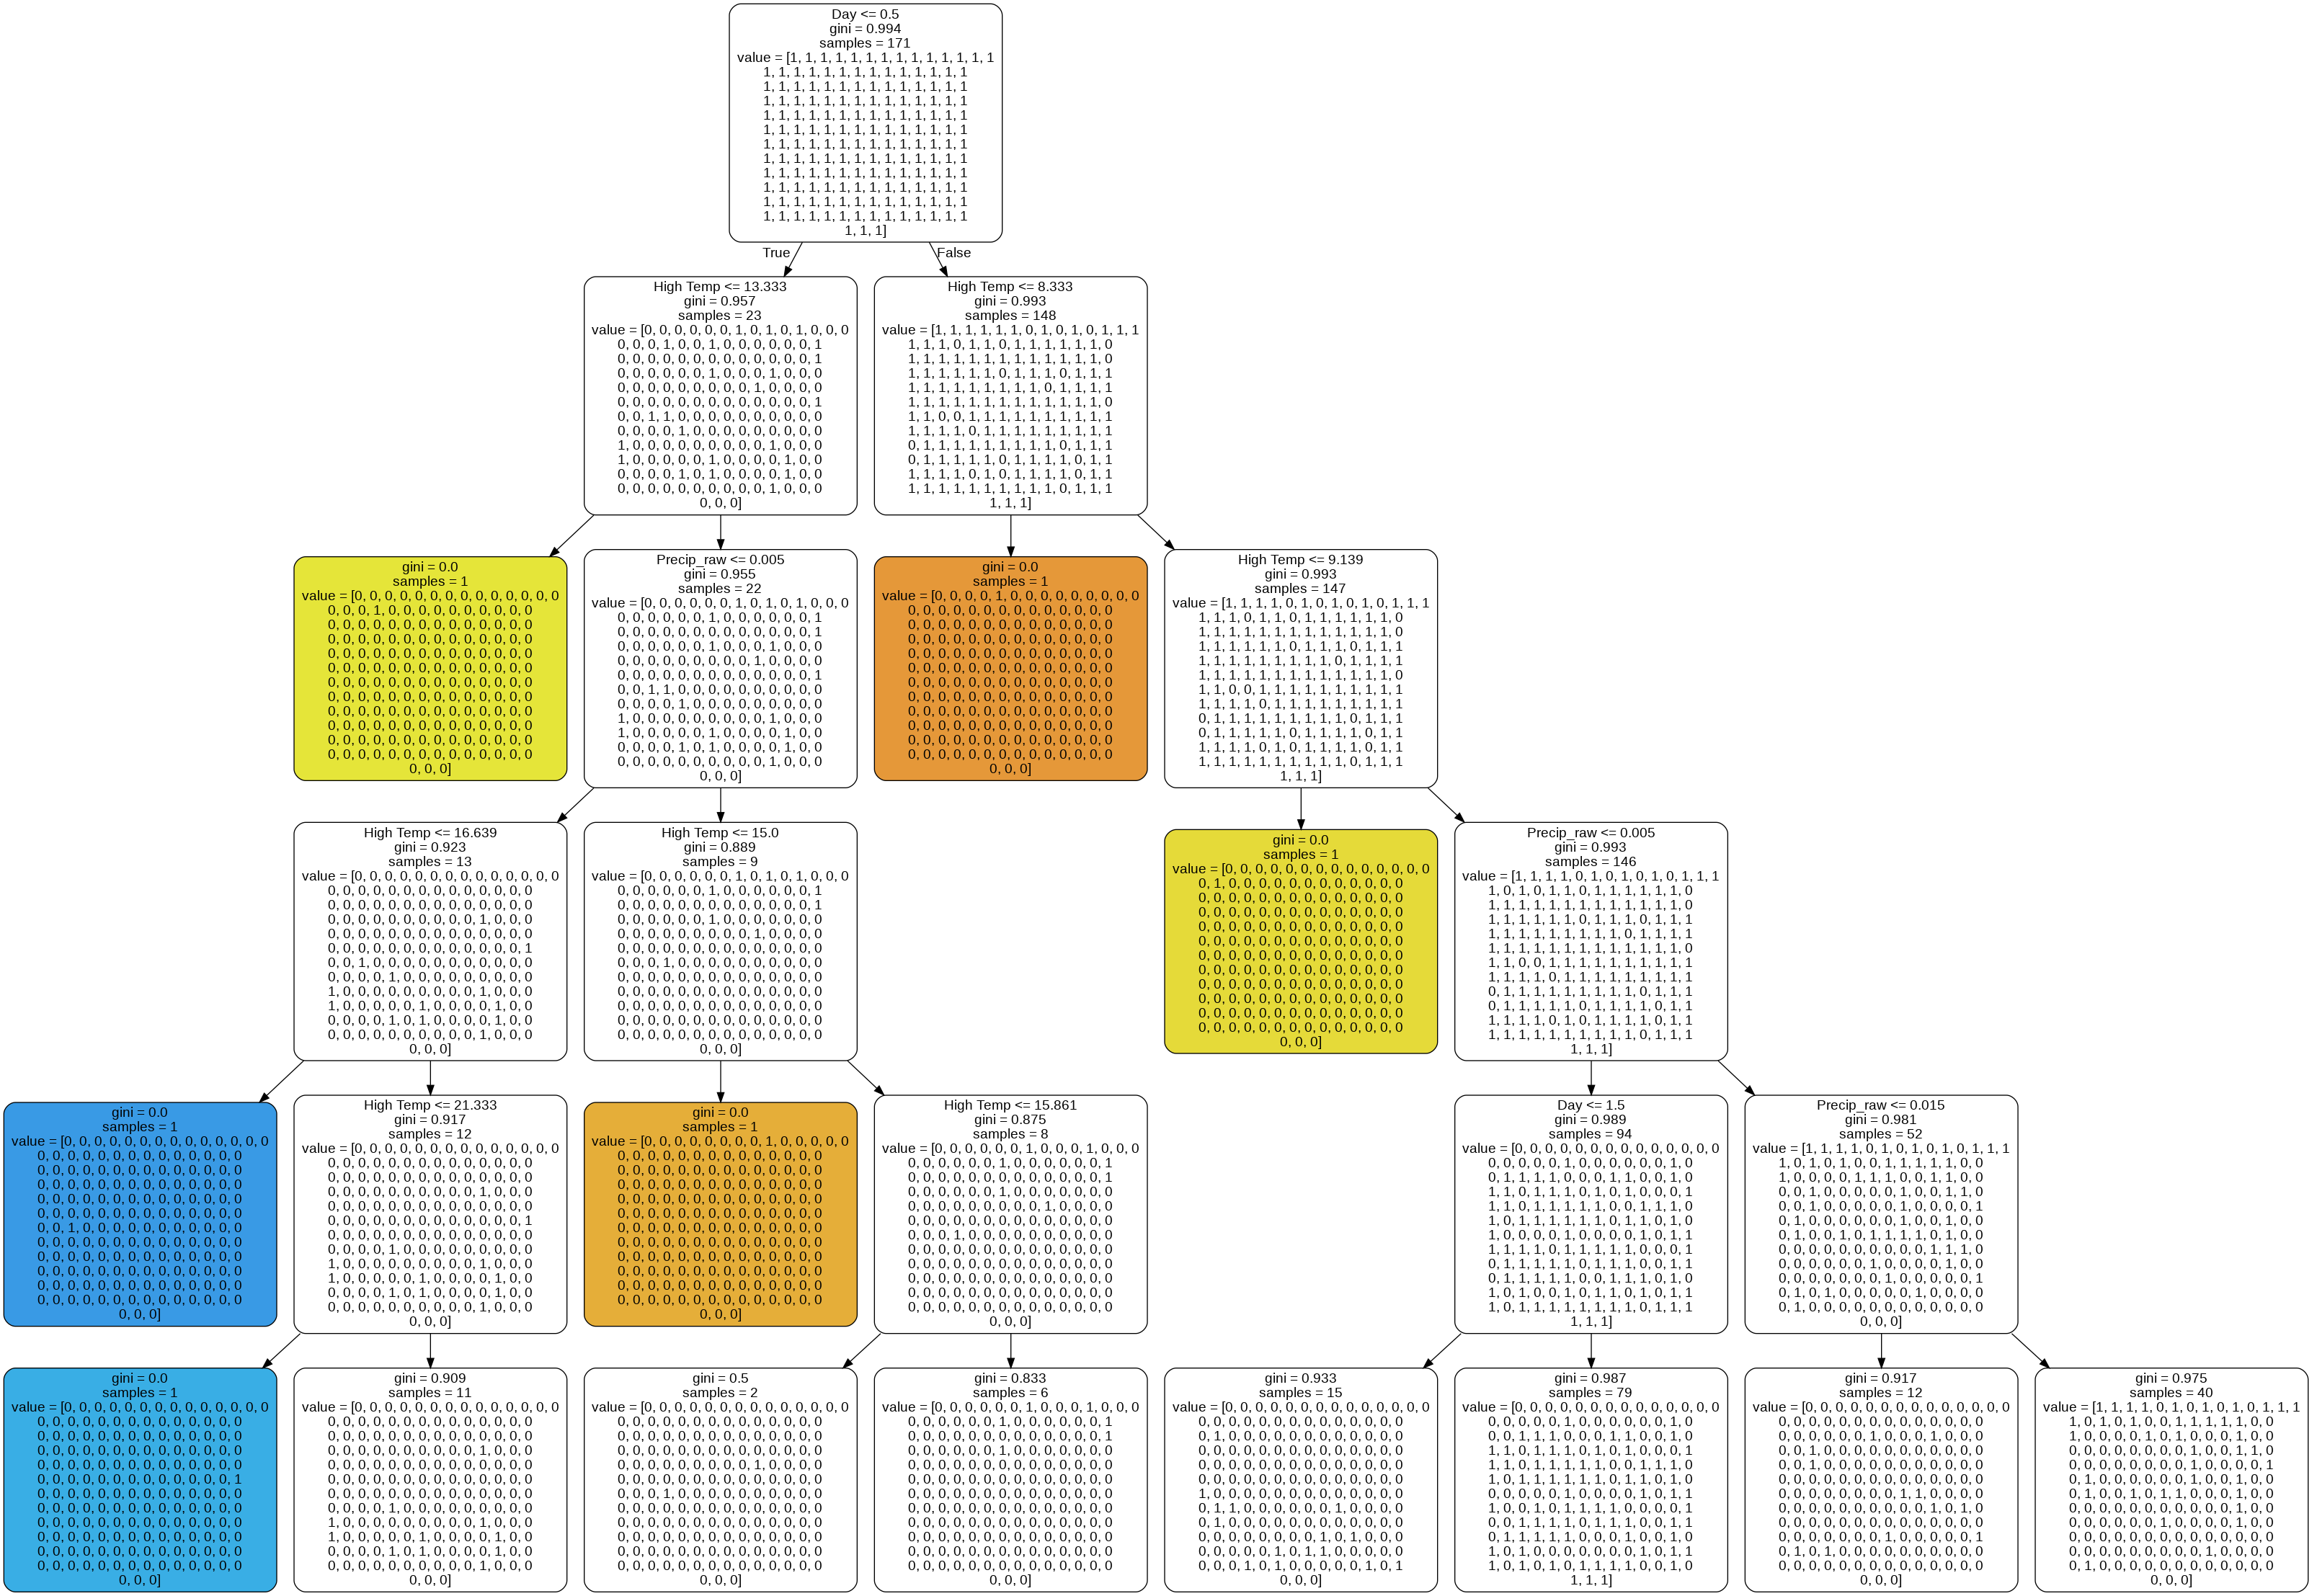

In [ ]:
from os import system
from subprocess import check_call
from IPython.display import Image



dotfile = open("dtree.dot", 'w')
tree.export_graphviz(decision_tree, out_file = dotfile, feature_names = X.columns, rounded=True, filled=True)
dotfile.close()
check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])
Image("dtree.png", width=800, height=500)


In [ ]:
pred_data_dt = decision_tree.predict(X_test)
predicted_dt = []
for index in range(len(y_test)):
  predicted_dt.append(
      [index,
      y_test['Total'].iloc[index],
      pred_data_dt[index]]
  )
predicted_dt = pd.DataFrame(predicted_dt, columns=['Index', 'y_test', 'Predicted value'])


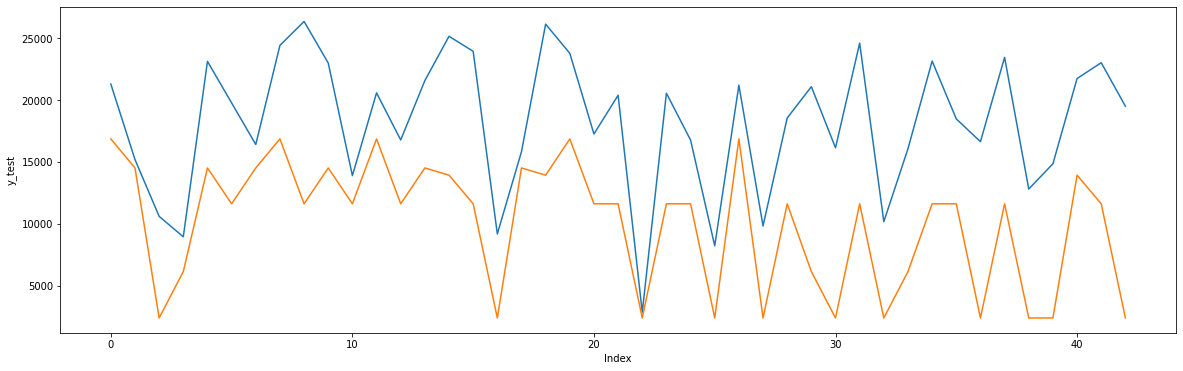

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Index', y = 'y_test', data = predicted_dt)
sns.lineplot(x='Index', y = 'Predicted value', data = predicted_dt)

In [ ]:
pred_data_dt = decision_tree.predict(pred_data.drop(['Predicted'], axis=1))

In [ ]:
pred_data['Predicted Decision Tree'] = pred_data_dt
pred_data


,Day,High Temp,Precip_raw,Predicted,Predicted Decision Tree
0,2,3.70,3.0,-8138.900979,5397
1,3,4.00,0.0,6713.360684,5397
2,4,4.49,0.0,6775.220121,5397
3,5,-0.79,0.0,-2436.687703,5397
4,6,-0.29,0.0,-3862.424550,5397
5,0,-0.84,3.0,-20466.043755,10865
6,1,0.38,0.6,-8492.596384,5397
7,2,-0.54,0.0,-739.760160,5397


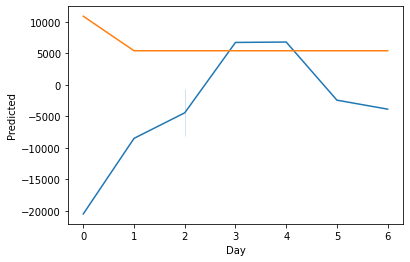

In [ ]:
sns.lineplot(x = 'Day', y = 'Predicted', data=pred_data)
sns.lineplot(x = 'Day', y = 'Predicted Decision Tree', data=pred_data)

# **MLP Regression**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
y_train = np.ravel(y_train)

Here I train the MLPRegressor model with some default values to get its score and compare it to models added later on.

In [ ]:
reg_model = MLPRegressor(
    hidden_layer_sizes=(16, 8, 4),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=10000,
    batch_size=64)

reg_model.fit(X_train_sc, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 8, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred = reg_model.predict(X_test_sc)
print(f"R2 score: {r2_score(y_pred, y_test)}")

R2 score: 0.5430862191791904


Finding the Layer sizes:


In [ ]:
for hidden_size in [(100,), (10, 5), (100, 50, 30)]:
    reg_model = MLPRegressor(
    hidden_layer_sizes=hidden_size,
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=10000,
    batch_size=64)
    reg_model.fit(X_train_sc, y_train)
    y_pred = reg_model.predict(X_test_sc)
    print(f'Dla {hidden_size} : \n',r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.



Dla (100,) : 
 0.48852436515698483


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.



Dla (10, 5) : 
 0.654081361171742
Dla (100, 50, 30) : 
 0.7736354553658255


Testing different activation functions:

In [ ]:
for activation_function in ['identity', 'logistic', 'tanh', 'relu']:
    reg_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 30),
    activation=activation_function,
    solver='adam',
    random_state=42,
    max_iter=10000,
    batch_size=64)
    reg_model.fit(X_train_sc, y_train)
    y_pred = reg_model.predict(X_test_sc)
    print(f'Dla {activation_function} : \n',r2_score(y_test, y_pred))

Dla identity : 
 0.36804973190243184


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.



Dla logistic : 
 -9.934049762075821


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.



Dla tanh : 
 -9.83843687064211
Dla relu : 
 0.7736354553658255


Finding the best batch size and maximum iterations number:


In [ ]:
for batch in [10, 20, 50, 100]:
    reg_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 30),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=10000,
    batch_size=batch)
    reg_model.fit(X_train_sc, y_train)
    y_pred = reg_model.predict(X_test_sc)
    print(f'Dla {batch} : \n',r2_score(y_test, y_pred))

Dla 10 : 
 0.7715502610388805
Dla 20 : 
 0.7847055515634538
Dla 50 : 
 0.8123796749882874
Dla 100 : 
 0.7841764813800949


In [ ]:
for iter in [100, 200, 500, 1000, 10000, 15000]:
    reg_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 30),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=iter,
    batch_size=50)
    reg_model.fit(X_train_sc, y_train)
    y_pred = reg_model.predict(X_test_sc)
    print(f'Dla {iter} : \n',r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Dla 100 : 
 -0.02734044473258357


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Dla 200 : 
 0.4727682020646954


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Dla 500 : 
 0.6974088901190196


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Dla 1000 : 
 0.7794169699740527
Dla 10000 : 
 0.8123796749882874
Dla 15000 : 
 0.8123796749882874


Final model:

In [ ]:
reg_model = MLPRegressor(
hidden_layer_sizes=(100, 50, 30),
activation='relu',
solver='adam',
random_state=42,
max_iter=10000,
batch_size=50)
reg_model.fit(X_train_sc, y_train)
y_pred = reg_model.predict(X_test_sc)
print(f'Dla {iter} : \n',r2_score(y_test, y_pred))

Dla 15000 : 
 0.8123796749882874


We got a R2 score of 0.81 which is a lot better than the Linear Regression models and Decision Trees.

Now we predict some data for a weather forecast in next 7 days:

In [ ]:
pred_data_nn = pred_data.drop(['Predicted'], axis=1)

In [ ]:
pred_data_sc = scaler.transform(pred_data_nn)
pred_data_nn['Predicted'] = reg_model.predict(pred_data_sc)
pred_data_nn

,Day,High Temp,Precip_raw,Predicted
0,2,3.70,3.0,5495.607571
1,3,4.00,0.0,15189.134851
2,4,4.49,0.0,11672.675082
3,5,-0.79,0.0,9134.491728
4,6,-0.29,0.0,9619.338793
5,0,-0.84,3.0,6475.184301
6,1,0.38,0.6,5569.675143
7,2,-0.54,0.0,18695.996259


In [ ]:
predictions['Predicted NN'] = pred_data_nn['Predicted']
predictions['Day'] = pred_data['Day']
predictions['High Temp'] = pred_data['High Temp']
predictions['Precipitation'] = pred_data['Precip_raw']

In [ ]:
predictions

,Predicted LR,Predicted NN,Day,High Temp,Precipitation
0,-6677.751165,5495.607571,2,3.70,3.0
1,6967.832383,15189.134851,3,4.00,0.0
2,6758.076732,11672.675082,4,4.49,0.0
3,-2202.687223,9134.491728,5,-0.79,0.0
4,-3758.907106,9619.338793,6,-0.29,0.0
5,-18644.797297,6475.184301,0,-0.84,3.0
6,-7494.325551,5569.675143,1,0.38,0.6
7,301.854425,18695.996259,2,-0.54,0.0


In [ ]:
predictions = predictions.drop(index=0)

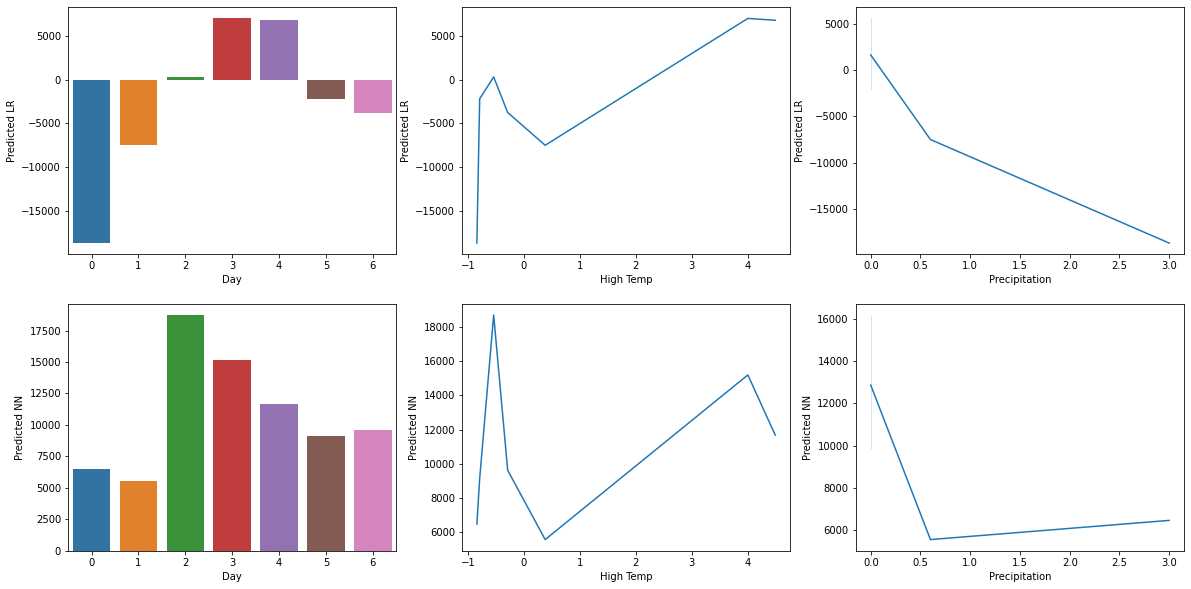

In [ ]:
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(231)
sns.barplot(x = 'Day', y = 'Predicted LR', data=predictions, ax=ax)
ax = f.add_subplot(232)
sns.lineplot(x = 'High Temp', y = 'Predicted LR', data=predictions, ax=ax)
ax = f.add_subplot(233)
sns.lineplot(x = 'Precipitation', y = 'Predicted LR', data=predictions, ax=ax)

ax = f.add_subplot(234)
sns.barplot(x = 'Day', y = 'Predicted NN', data=predictions, ax=ax)
ax = f.add_subplot(235)
sns.lineplot(x = 'High Temp', y = 'Predicted NN', data=predictions, ax=ax)
ax = f.add_subplot(236)
sns.lineplot(x = 'Precipitation', y = 'Predicted NN', data=predictions, ax=ax)

We got much better results than previous models. Linear Regression (top row of graphs) has predicted a lot of negative values due to a fact that the dataset did not provide much data for very low temperatures.
Neural network (bottom row of graphs) however managed to predict very convincing data based on current weather forecast.